# Initial Modeling Notebook

## Importing Packages

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids, EditedNearestNeighbours, RandomUnderSampler, TomekLinks, CondensedNearestNeighbour
from imblearn.combine import SMOTETomek, SMOTEENN

%reload_ext autoreload
%autoreload 2
from utils import *

In [2]:
train = pickle.load(open("../data/train.pickle", "rb"))
val = pickle.load(open("../data/val.pickle", "rb"))

## Train-Test Split

In [3]:
train.head()

,tweet,target,lem
0,big night wcvb martha coakleycharlie baker de...,0,big night wcvb martha coakleycharlie baker deb...
1,not one bitch texting right now followers in...,0,not one bitch texting right now follower inch ...
2,going miss these bitches much far right she...,0,going miss these bitch much far right she rest...
3,hope shes larger than bird,0,hope shes larger than bird
4,all went through much shit together miss th...,0,all went through much shit together miss them ...


In [4]:
train.target.value_counts()

0    17518
1     1069
Name: target, dtype: int64

## Stopwords Removal

In [5]:
stop_words = set(stopwords.words('english'))
stop_list = [''.join(c for c in s if c not in string.punctuation) for s in stop_words]
train.lem = train['lem'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_list]))
train.head()

,tweet,target,lem
0,big night wcvb martha coakleycharlie baker de...,0,big night wcvb martha coakleycharlie baker deb...
1,not one bitch texting right now followers in...,0,one bitch texting right follower inch rim inch...
2,going miss these bitches much far right she...,0,going miss bitch much far right resting girl b...
3,hope shes larger than bird,0,hope larger bird
4,all went through much shit together miss th...,0,went much shit together miss bitch


In [6]:
val.lem = val['lem'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_list]))
val.head()

,tweet,target,lem
0,got missed call from bitch,0,got missed call bitch
1,fucking with bad bitch you gone need some mon...,0,fucking bad bitch gone need money lil homie
2,lol credit aint where near good but know th...,0,lol credit aint near good know right man job n...
3,wipe the cum out them faggot contact lens wi...,0,wipe cum faggot contact lens wildin cant see shit
4,niggas cheat they bitch and dont expect pay ...,0,nigga cheat bitch expect pay back whatsoever y...


## Assign Feature and Target Variable

In [7]:
X_tr = train.lem
X_val = val.lem
y_tr = train.target
y_val = val.target

## TF-IDF Vectorizer

In [8]:
vec = TfidfVectorizer()
tfidf_tr = vec.fit_transform(X_tr)
tfidf_val = vec.transform(X_val)

## Multinomial Naive Bayes

In [9]:
nb = MultinomialNB().fit(tfidf_tr, y_tr)
y_pr_nb_tr = nb.predict(tfidf_tr)
y_pr_nb_val = nb.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_nb_tr, y_pr_nb_val, nb)

Training F1 Score:  0.012999071494893223
Validation F1 Score:  0.0
Training Recall Score:  0.006548175865294668
Validation Recall Score:  0.0
Training Precision Score:  0.875
Validation Precision Score:  0.0
Training Average Precision Score:  0.3116566296066867
Validation Average Precision Score:  0.16459404191710594


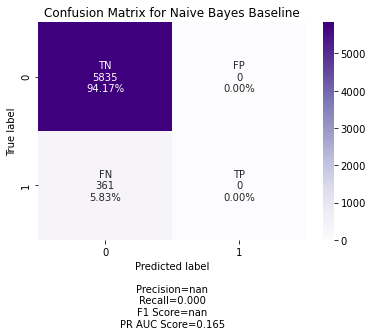

In [10]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_nb_val),
                      cmap='Purples',
                      X = tfidf_val,
                      y = y_val,
                      model = nb,
                      title='Confusion Matrix for Naive Bayes Baseline')

## Random Forest Classifier

In [11]:
rf = RandomForestClassifier(n_estimators=100).fit(tfidf_tr, y_tr)
y_pr_rf_tr = rf.predict(tfidf_tr)
y_pr_rf_val = rf.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_rf_tr, y_pr_rf_val, rf)

Training F1 Score:  0.9818012132524497
Validation F1 Score:  0.17488789237668162
Training Recall Score:  0.9840972871842844
Validation Recall Score:  0.10803324099722991
Training Precision Score:  0.9795158286778398
Validation Precision Score:  0.4588235294117647
Training Average Precision Score:  0.983959528650008
Validation Average Precision Score:  0.3076625261660134


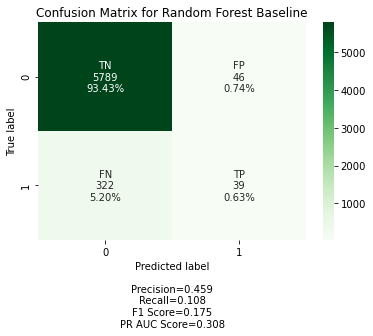

In [12]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_rf_val),
                      cmap='Greens',
                      X = tfidf_val,
                      y = y_val,
                      model = rf,
                      title='Confusion Matrix for Random Forest Baseline')

## Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier().fit(tfidf_tr, y_tr)
y_pr_dt_tr = dt.predict(tfidf_tr)
y_pr_dt_val = dt.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_dt_tr, y_pr_dt_val, dt)

Training F1 Score:  0.982718355908454
Validation F1 Score:  0.284375
Training Recall Score:  0.9840972871842844
Validation Recall Score:  0.2520775623268698
Training Precision Score:  0.9813432835820896
Validation Precision Score:  0.32616487455197135
Training Average Precision Score:  0.9988489752603649
Validation Average Precision Score:  0.12578093441973817


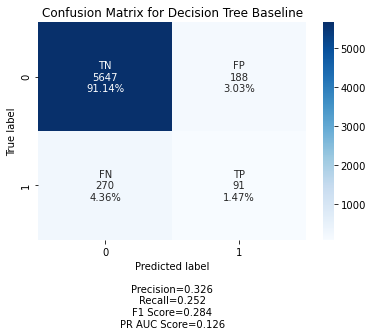

In [14]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_dt_val),
                      cmap='Blues',
                      X = tfidf_val,
                      y = y_val,
                      model = dt,
                      title='Confusion Matrix for Decision Tree Baseline')

## Logistic Regression

In [15]:
log = LogisticRegression().fit(tfidf_tr, y_tr)
y_pr_log_tr = log.predict(tfidf_tr)
y_pr_log_val = log.predict(tfidf_val)
get_metrics(tfidf_tr, y_tr, tfidf_val, y_val, y_pr_log_tr, y_pr_log_val, log)

Training F1 Score:  0.2517591868647381
Validation F1 Score:  0.1776765375854214
Training Recall Score:  0.15060804490177737
Validation Recall Score:  0.10803324099722991
Training Precision Score:  0.7666666666666667
Validation Precision Score:  0.5
Training Average Precision Score:  0.5832736972939867
Validation Average Precision Score:  0.3511950064299681


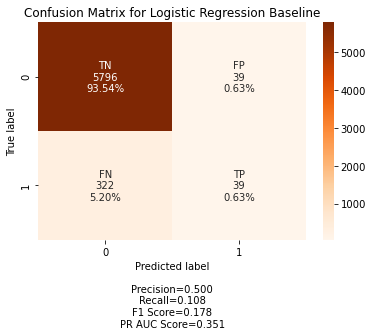

In [16]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_log_val),
                      cmap='Oranges',
                      X = tfidf_val,
                      y = y_val,
                      model = log,
                      title='Confusion Matrix for Logistic Regression Baseline')

# Undersampling Methods

In [17]:
# separate minority and majority classes
majority = train[train.target==0]
minority = train[train.target==1]

#baseline counts
counter = Counter(y_tr)
print("Baseline: ", counter)

Baseline:  Counter({0: 17518, 1: 1069})


## Random UnderSampler

In [18]:
rus = RandomUnderSampler()
X_tr_rus, y_tr_rus = rus.fit_sample(tfidf_tr, y_tr)
counter_rus = Counter(y_tr_rus)
print("Random Undersampler: ", counter_rus)

Random Undersampler:  Counter({0: 1069, 1: 1069})


In [19]:
nb2 = MultinomialNB().fit(X_tr_rus, y_tr_rus)
y_pr_nb2_tr = nb2.predict(X_tr_rus)
y_pr_nb2_val = nb2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_nb2_tr, y_pr_nb2_val, nb2)

Training F1 Score:  0.9391955098222639
Validation F1 Score:  0.24203273040482345
Training Recall Score:  0.9391955098222639
Validation Recall Score:  0.778393351800554
Training Precision Score:  0.9391955098222639
Validation Precision Score:  0.1432942376338603
Training Average Precision Score:  0.9796101446219809
Validation Average Precision Score:  0.3215033412130317


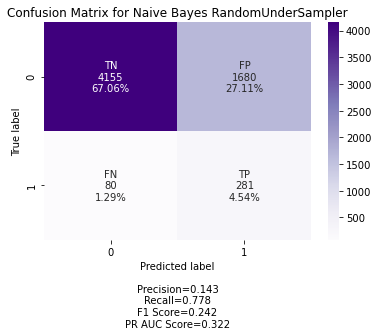

In [20]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_nb2_val),
                      cmap='Purples',
                      X = tfidf_val,
                      y = y_val,
                      model = nb2,
                      title='Confusion Matrix for Naive Bayes RandomUnderSampler')

In [21]:
rf2 = RandomForestClassifier(n_estimators=100).fit(X_tr_rus, y_tr_rus)
y_pr_rf2_tr = rf2.predict(X_tr_rus)
y_pr_rf2_val = rf2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_rf2_tr, y_pr_rf2_val, rf2)

Training F1 Score:  0.9981308411214953
Validation F1 Score:  0.3079604880883207
Training Recall Score:  0.9990645463049579
Validation Recall Score:  0.7340720221606648
Training Precision Score:  0.9971988795518207
Validation Precision Score:  0.1948529411764706
Training Average Precision Score:  0.9992081838791517
Validation Average Precision Score:  0.3121281064307362


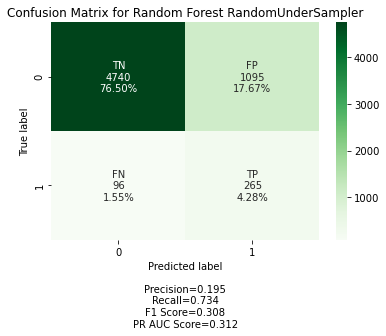

In [22]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_rf2_val),
                      cmap='Greens',
                      X = tfidf_val,
                      y = y_val,
                      model = rf2,
                      title='Confusion Matrix for Random Forest RandomUnderSampler')

In [23]:
log2 = LogisticRegression().fit(X_tr_rus, y_tr_rus)
y_pr_log2_tr = log2.predict(X_tr_rus)
y_pr_log2_val = log2.predict(tfidf_val)
get_metrics(X_tr_rus, y_tr_rus, tfidf_val, y_val, y_pr_log2_tr, y_pr_log2_val, log2)

Training F1 Score:  0.9026036644165862
Validation F1 Score:  0.34468937875751504
Training Recall Score:  0.8755846585594013
Validation Recall Score:  0.7146814404432132
Training Precision Score:  0.9313432835820895
Validation Precision Score:  0.22711267605633803
Training Average Precision Score:  0.9620756062092991
Validation Average Precision Score:  0.3324163914753356


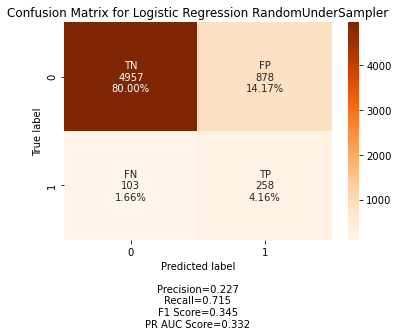

In [24]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_log2_val),
                      cmap='Oranges',
                      X = tfidf_val,
                      y = y_val,
                      model = log2,
                      title='Confusion Matrix for Logistic Regression RandomUnderSampler')

## Condensed Nearest Neighbour

In [25]:
cnn = CondensedNearestNeighbour(n_neighbors=2)
X_tr_cnn, y_tr_cnn = cnn.fit_resample(tfidf_tr, y_tr)
counter_cnn = Counter(y_tr_cnn)
print("Condensed Nearest Neighbors: ", counter_cnn)

Condensed Nearest Neighbors:  Counter({1: 1069, 0: 558})


In [26]:
nb3 = MultinomialNB().fit(X_tr_cnn, y_tr_cnn)
y_pr_nb3_tr = nb3.predict(X_tr_cnn)
y_pr_nb3_val = nb3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_nb3_tr, y_pr_nb3_val, nb3)

Training F1 Score:  0.8120015191796429
Validation F1 Score:  0.11065006915629323
Training Recall Score:  1.0
Validation Recall Score:  0.997229916897507
Training Precision Score:  0.6835038363171355
Validation Precision Score:  0.0585746827204686
Training Average Precision Score:  0.9567883984756785
Validation Average Precision Score:  0.19699419810966567


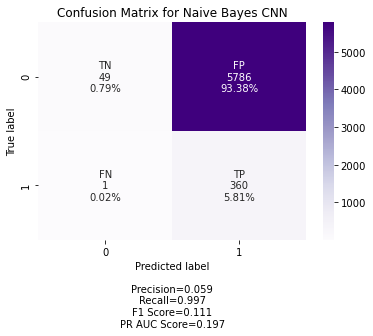

In [27]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_nb3_val),
                      cmap='Purples',
                      X = tfidf_val,
                      y = y_val,
                      model = nb3,
                      title='Confusion Matrix for Naive Bayes CNN')

In [28]:
rf3 = RandomForestClassifier(n_estimators=100).fit(X_tr_cnn, y_tr_cnn)
y_pr_rf3_tr = rf3.predict(X_tr_cnn)
y_pr_rf3_val = rf3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_rf3_tr, y_pr_rf3_val, rf3)

Training F1 Score:  0.987505784359093
Validation F1 Score:  0.18064516129032257
Training Recall Score:  0.9981290926099158
Validation Recall Score:  0.853185595567867
Training Precision Score:  0.9771062271062271
Validation Precision Score:  0.10101672679567071
Training Average Precision Score:  0.9989313313730732
Validation Average Precision Score:  0.2334951032535639


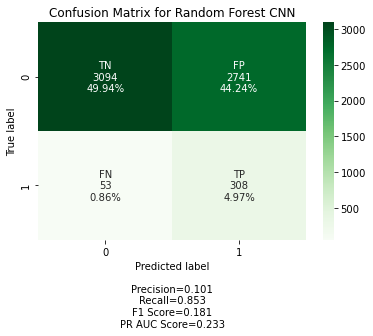

In [29]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_rf3_val),
                      cmap='Greens',
                      X = tfidf_val,
                      y = y_val,
                      model = rf3,
                      title='Confusion Matrix for Random Forest CNN')

In [30]:
log3 = LogisticRegression().fit(X_tr_cnn, y_tr_cnn)
y_pr_log3_tr = log3.predict(X_tr_cnn)
y_pr_log3_val = log3.predict(tfidf_val)
get_metrics(X_tr_cnn, y_tr_cnn, tfidf_val, y_val, y_pr_log3_tr, y_pr_log3_val, log3)

Training F1 Score:  0.8683774834437087
Validation F1 Score:  0.14156004952538176
Training Recall Score:  0.9812909260991581
Validation Recall Score:  0.9501385041551247
Training Precision Score:  0.7787676317743133
Validation Precision Score:  0.07647714604236343
Training Average Precision Score:  0.933210390573777
Validation Average Precision Score:  0.25162038429139183


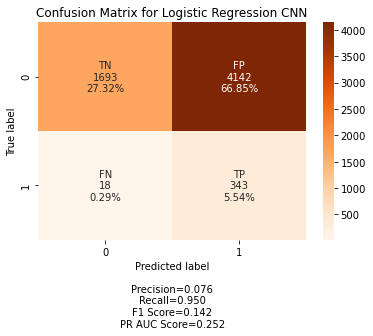

In [31]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_log3_val),
                      cmap='Oranges',
                      X = tfidf_val,
                      y = y_val,
                      model = log3,
                      title='Confusion Matrix for Logistic Regression CNN')

## SMOTE-ENN

In [32]:
sme = SMOTEENN(sampling_strategy="minority")
X_tr_sme, y_tr_sme = sme.fit_sample(tfidf_tr, y_tr)
counter_sme = Counter(y_tr_sme)
print("SMOTE-ENN: ", counter_sme)

SMOTE-ENN:  Counter({1: 17450, 0: 16087})


In [33]:
nb4 = MultinomialNB().fit(X_tr_sme, y_tr_sme)
y_pr_nb4_tr = nb4.predict(X_tr_sme)
y_pr_nb4_val = nb4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_nb4_tr, y_pr_nb4_val, nb4)

Training F1 Score:  0.9575670285840905
Validation F1 Score:  0.2832618025751073
Training Recall Score:  0.9906017191977078
Validation Recall Score:  0.6398891966759003
Training Precision Score:  0.9266645223544548
Validation Precision Score:  0.18188976377952756
Training Average Precision Score:  0.9952995585933091
Validation Average Precision Score:  0.280343801414488


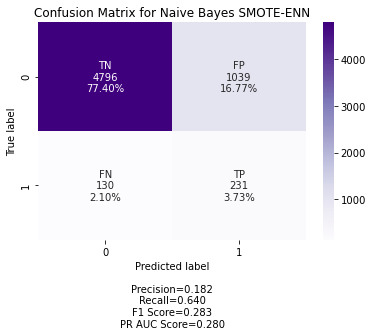

In [34]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_nb4_val),
                      cmap='Purples',
                      X = tfidf_val,
                      y = y_val,
                      model = nb4,
                      title='Confusion Matrix for Naive Bayes SMOTE-ENN')

In [35]:
rf4 = RandomForestClassifier(n_estimators=100).fit(X_tr_sme, y_tr_sme)
y_pr_rf4_tr = rf4.predict(X_tr_sme)
y_pr_rf4_val = rf4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_rf4_tr, y_pr_rf4_val, rf4)

Training F1 Score:  1.0
Validation F1 Score:  0.39330543933054396
Training Recall Score:  1.0
Validation Recall Score:  0.39058171745152354
Training Precision Score:  1.0
Validation Precision Score:  0.3960674157303371
Training Average Precision Score:  1.0
Validation Average Precision Score:  0.2876833897423311


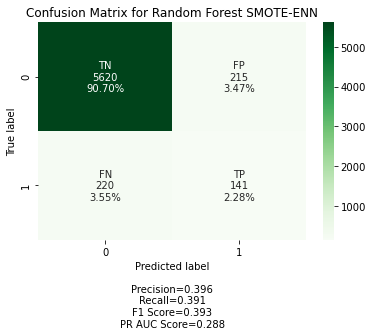

In [36]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_rf4_val),
                      cmap='Greens',
                      X = tfidf_val,
                      y = y_val,
                      model = rf4,
                      title='Confusion Matrix for Random Forest SMOTE-ENN')

In [37]:
log4 = LogisticRegression().fit(X_tr_sme, y_tr_sme)
y_pr_log4_tr = nb4.predict(X_tr_sme)
y_pr_log4_val = nb4.predict(tfidf_val)
get_metrics(X_tr_sme, y_tr_sme, tfidf_val, y_val, y_pr_log4_tr, y_pr_log4_val, log4)

Training F1 Score:  0.9575670285840905
Validation F1 Score:  0.2832618025751073
Training Recall Score:  0.9906017191977078
Validation Recall Score:  0.6398891966759003
Training Precision Score:  0.9266645223544548
Validation Precision Score:  0.18188976377952756
Training Average Precision Score:  0.9930387293012634
Validation Average Precision Score:  0.3112941518398897


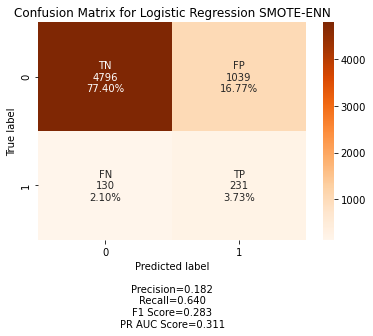

In [38]:
make_confusion_matrix(cf = confusion_matrix(y_val, y_pr_log4_val),
                      cmap='Oranges',
                      X = tfidf_val,
                      y = y_val,
                      model = log4,
                      title='Confusion Matrix for Logistic Regression SMOTE-ENN')

In [42]:
data = {'F1 Score': [f1(y_val, y_pr_nb_val), 
                     f1(y_val, y_pr_rf_val), 
                     f1(y_val, y_pr_dt_val), 
                     f1(y_val, y_pr_log_val), 
                     f1(y_val, y_pr_nb2_val), 
                     f1(y_val, y_pr_rf2_val), 
                     f1(y_val, y_pr_log2_val), 
                     f1(y_val, y_pr_nb3_val),
                     f1(y_val, y_pr_rf3_val),
                     f1(y_val, y_pr_log3_val),
                     f1(y_val, y_pr_rf4_val),                     
                     f1(y_val, y_pr_nb4_val),
                     f1(y_val, y_pr_log4_val)],
        'Recall': [recall(y_val, y_pr_nb_val), 
                   recall(y_val, y_pr_rf_val), 
                   recall(y_val, y_pr_dt_val), 
                   recall(y_val, y_pr_log_val), 
                   recall(y_val, y_pr_nb2_val), 
                   recall(y_val, y_pr_rf2_val), 
                   recall(y_val, y_pr_log2_val),
                   recall(y_val, y_pr_nb3_val),
                   recall(y_val, y_pr_rf3_val),
                   recall(y_val, y_pr_log3_val),
                   recall(y_val, y_pr_nb4_val),                   
                   recall(y_val, y_pr_rf4_val),
                   recall(y_val, y_pr_log4_val)],
        'Precision': [precision(y_val, y_pr_nb_val), 
                      precision(y_val, y_pr_rf_val), 
                      precision(y_val, y_pr_dt_val), 
                      precision(y_val, y_pr_log_val), 
                      precision(y_val, y_pr_nb2_val),
                      precision(y_val, y_pr_rf2_val), 
                      precision(y_val, y_pr_log2_val),
                      precision(y_val, y_pr_nb3_val),
                      precision(y_val, y_pr_rf3_val),
                      precision(y_val, y_pr_log3_val),
                      precision(y_val, y_pr_nb4_val),
                      precision(y_val, y_pr_rf4_val),                                       
                      precision(y_val, y_pr_log4_val)],
        'PR AUC': [aps(tfidf_val, y_val, nb),
                   aps(tfidf_val, y_val, rf),
                   aps(tfidf_val, y_val, dt),
                   aps(tfidf_val, y_val, log),
                   aps(tfidf_val, y_val, nb2),
                   aps(tfidf_val, y_val, rf2),
                   aps(tfidf_val, y_val, log2),
                   aps(tfidf_val, y_val, nb3),
                   aps(tfidf_val, y_val, rf3),
                   aps(tfidf_val, y_val, log3),
                   aps(tfidf_val, y_val, nb4),
                   aps(tfidf_val, y_val, rf4),                        
                   aps(tfidf_val, y_val, log4)]}
baseline = pd.DataFrame(data=data, index = ['Naive Bayes Baseline',
                                            'Random Forest Baseline', 
                                            'Decision Tree Baseline', 
                                            'Logistic Regression Baseline',
                                            'Naive Bayes RUS',
                                            'Random Forest RUS',  
                                            'Logistic Regression RUS', 
                                            'Naive Bayes CNN',
                                            'Random Forest CNN', 
                                            'Logistic Regression CNN', 
                                            'Naive Bayes SMOTE-ENN',
                                            'Random Forest SMOTE-ENN', 
                                            'Logistic Regression SMOTE-ENN'])

ZeroDivisionError: float division by zero

In [ ]:
data